###Upload the data files

In [2]:
from google.colab import files
import pandas as pd

print("Upload extracted_results_all.csv")
uploaded1 = files.upload()

print("Upload email_evals1.csv")
uploaded2 = files.upload()

df_names = pd.read_csv(list(uploaded1.keys())[0])
df_emails = pd.read_csv(list(uploaded2.keys())[0])

df_names.head(), df_emails.head()

Upload extracted_results_all.csv


Saving extracted_results_all.csv to extracted_results_all (1).csv
Upload email_evals1.csv


Saving email_evals1.csv to email_evals1 (1).csv


(      folder groundtruth_name         groundtruth_email     spoken_name  \
 0   m_audio1    Rachel Hardin   rhardin5510@hotmail.com   Rachel Hardin   
 1  m_audio10      Susan Smith     susan.smith@yahoo.com     Susan Smith   
 2  m_audio11       Mary White        mary.white@aol.com      Mary White   
 3  m_audio12    Steven Harris  steven.harris@icloud.com  Stephen Harris   
 4  m_audio13      Jeremy Hall     jeremy.hall@yahoo.com     Jeremy Hall   
 
   spoken_email_local spoken_email_domain                spoken_email  \
 0        rhardin5510        hotmail.com.    rhardin5510@hotmail.com.   
 1        susan.smith          yahoo.com.      susan.smith@yahoo.com.   
 2         mary.white            aol.com.         mary.white@aol.com.   
 3     stephen.harris         icloud.com.  stephen.harris@icloud.com.   
 4        jeremy.hall          yahoo.com.      jeremy.hall@yahoo.com.   
 
                                          spelled_raw             spelled_ai  \
 0              R-A-C-

###Column selection and merging column data necessary for evaluation

In [19]:
# Select required columns from the names dataset
name_cols = [
    "folder",
    "groundtruth_name",
    "groundtruth_email", # Include groundtruth_email from df_names
    "spoken_name",
    "spelled_ai",
    "final_name",
    "spoken_email",       # Include spoken_email
    "spelled_email_ai",   # Include spelled_email_ai
    "final_email"         # Include final_email
]

df_names_clean = df_names[name_cols]

# Select required columns from the email dataset
email_cols = [
    "folder",
    # "groundtruth_email", # Removed groundtruth_email from here to avoid duplicate columns after merge
    "extracted_email"
]

df_emails_clean = df_emails[email_cols]

# Merge on folder
df_merged = pd.merge(df_names_clean, df_emails_clean, on="folder", how="inner")

df_merged.head()

,folder,groundtruth_name,groundtruth_email,spoken_name,spelled_ai,final_name,spoken_email,spelled_email_ai,final_email,extracted_email
0,m_audio1,Rachel Hardin,rhardin5510@hotmail.com,Rachel Hardin,Rachel Hardin,Rachel Hardin,rhardin5510@hotmail.com.,rachelhardin@hotmail.com,rachelhardin@hotmail.com,rhardin5510@hotmail.com
1,m_audio10,Susan Smith,susan.smith@yahoo.com,Susan Smith,Susan Smith,Susan Smith,susan.smith@yahoo.com.,susan.smith@yahoo.com,susan.smith@yahoo.com,susan.smith@yahoo.com
2,m_audio11,Mary White,mary.white@aol.com,Mary White,Mary Hite,Mary Hite,mary.white@aol.com.,maryhite@aol.com,maryhite@aol.com,mary.hite@gmail.com
3,m_audio12,Steven Harris,steven.harris@icloud.com,Stephen Harris,Steven Harris I Cloud,Steven Harris I Cloud,stephen.harris@icloud.com.,stevenharris@icloud.com,stevenharris@icloud.com,stevenharris@icloud.com
4,m_audio13,Jeremy Hall,jeremy.hall@yahoo.com,Jeremy Hall,Jeremy Hall,Jeremy Hall,jeremy.hall@yahoo.com.,jeremyhall@yahoo.com,jeremyhall@yahoo.com,jeremy.hall@yahoo.com


In [13]:
from google.colab import files

df_merged.to_csv('merged_data.csv', index=False)
files.download('merged_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

###Normalizing and Accuracy computation

In [5]:
def normalize(x):
    return str(x).strip().lower()

df_merged["name_correct"] = df_merged.apply(
    lambda row: normalize(row["final_name"]) == normalize(row["groundtruth_name"]),
    axis=1
)

df_merged["email_correct"] = df_merged.apply(
    lambda row: normalize(row["extracted_email"]) == normalize(row["groundtruth_email"]),
    axis=1
)

# Compute percentages
name_accuracy = df_merged["name_correct"].mean() * 100
email_accuracy = df_merged["email_correct"].mean() * 100

print("Name Accuracy: {:.2f}%".format(name_accuracy))
print("Email Accuracy: {:.2f}%".format(email_accuracy))


Name Accuracy: 73.65%
Email Accuracy: 58.11%


In [6]:
def norm(x):
    return str(x).strip().lower()

In [7]:
df_merged["spoken_correct"] = df_merged.apply(
    lambda row: norm(row["spoken_name"]) == norm(row["groundtruth_name"]),
    axis=1
)

df_merged["spelled_correct"] = df_merged.apply(
    lambda row: norm(row["spelled_ai"]) == norm(row["groundtruth_name"]),
    axis=1
)

df_merged["final_name_correct"] = df_merged.apply(
    lambda row: norm(row["final_name"]) == norm(row["groundtruth_name"]),
    axis=1
)

###Calculating correct count and total accuracy

In [8]:
total = len(df_merged)

spoken_count = df_merged["spoken_correct"].sum()
spelled_count = df_merged["spelled_correct"].sum()
final_count = df_merged["final_name_correct"].sum()

spoken_pct = (spoken_count / total) * 100
spelled_pct = (spelled_count / total) * 100
final_pct = (final_count / total) * 100

name_summary = pd.DataFrame({
    "Category": [
        "Spoken Name Accuracy",
        "Spelled Name Accuracy (AI)",
        "Final Name Accuracy"
    ],
    "Correct Count": [
        spoken_count,
        spelled_count,
        final_count
    ],
    "Total": [
        total,
        total,
        total
    ],
    "Accuracy %": [
        spoken_pct,
        spelled_pct,
        final_pct
    ]
})

name_summary

,Category,Correct Count,Total,Accuracy %
0,Spoken Name Accuracy,118,148,79.729730
1,Spelled Name Accuracy (AI),107,148,72.297297
2,Final Name Accuracy,109,148,73.648649


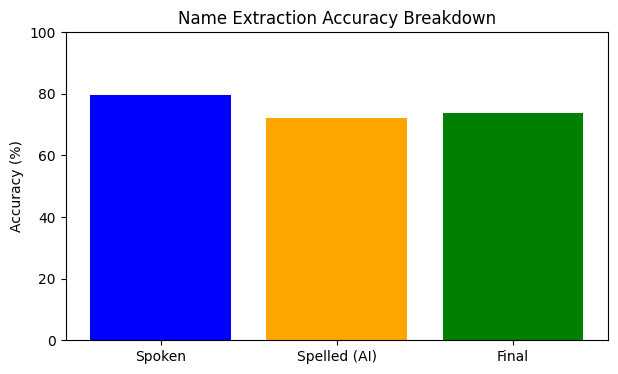

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,4))
plt.bar(
    ["Spoken", "Spelled (AI)", "Final"],
    [spoken_pct, spelled_pct, final_pct],
    color=["blue", "orange", "green"]
)

plt.ylabel("Accuracy (%)")
plt.ylim(0, 100)
plt.title("Name Extraction Accuracy Breakdown")
plt.show()

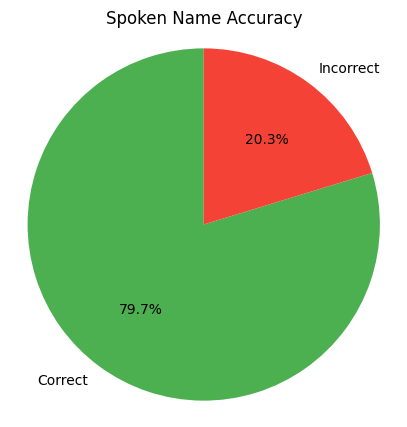

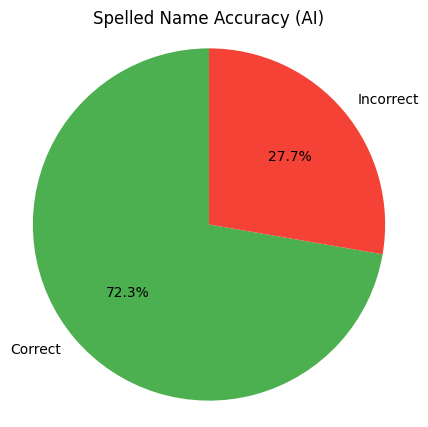

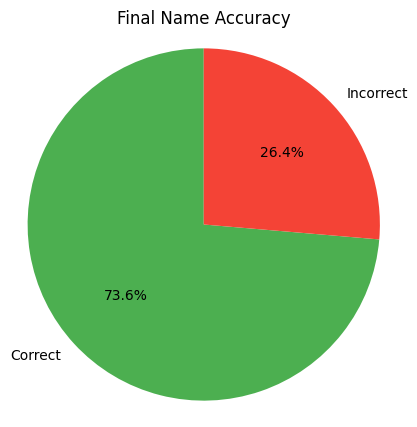

In [10]:
import matplotlib.pyplot as plt

def plot_pie(correct, total, title):
    incorrect = total - correct
    labels = ["Correct", "Incorrect"]
    sizes = [correct, incorrect]
    colors = ["#4CAF50", "#F44336"]  # green, red

    plt.figure(figsize=(5,5))
    plt.pie(
        sizes,
        labels=labels,
        autopct="%1.1f%%",
        startangle=90,
        colors=colors
    )
    plt.title(title)
    plt.axis("equal")
    plt.show()


# Spoken Name Pie
plot_pie(
    spoken_count,
    total,
    "Spoken Name Accuracy"
)

# Spelled (AI) Pie
plot_pie(
    spelled_count,
    total,
    "Spelled Name Accuracy (AI)"
)

# Final Name Pie
plot_pie(
    final_count,
    total,
    "Final Name Accuracy"
)

In [21]:
from google.colab import files
uploaded = files.upload()

Saving merged_data.csv to merged_data (2).csv


In [23]:
import pandas as pd

df = pd.read_csv("merged_data.csv")
print(df.columns.tolist())

['folder', 'groundtruth_name', 'spoken_name', 'spelled_ai', 'final_name', 'groundtruth_email', 'extracted_email', 'name_correct', 'email_correct', 'spoken_correct', 'spelled_correct', 'final_name_correct']


###Email extraction accuracy

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Load merged CSV
df = pd.read_csv("merged_data.csv")

# Normalize emails for safe comparison
def norm(x):
    if pd.isna(x):
        return ""
    return str(x).strip().lower()

df["gt_email_norm"] = df["groundtruth_email"].apply(norm)
df["extracted_email_norm"] = df["extracted_email"].apply(norm)

# Compute accuracy
df["email_match"] = df["gt_email_norm"] == df["extracted_email_norm"]

correct = df["email_match"].sum()
total = len(df)
accuracy = correct / total * 100

print("EMAIL EXTRACTION ACCURACY:")
print(f"Correct: {correct} / {total}")
print(f"Accuracy: {accuracy:.2f}%")

EMAIL EXTRACTION ACCURACY:
Correct: 86 / 148
Accuracy: 58.11%


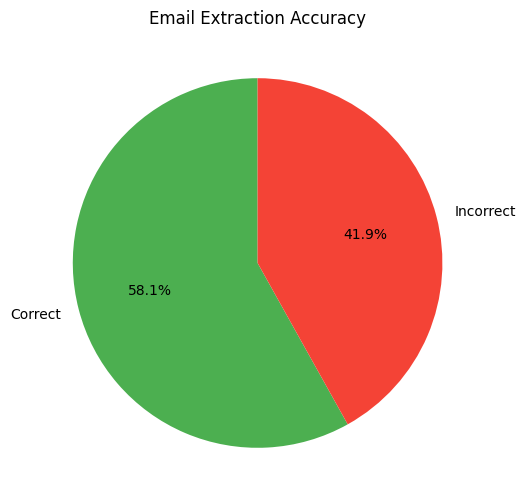

In [25]:
labels = ["Correct", "Incorrect"]
sizes = [correct, total - correct]

plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, autopct="%1.1f%%", startangle=90, colors=["#4CAF50", "#F44336"])
plt.title("Email Extraction Accuracy")
plt.show()